# Data Analytics -  Lab 1 - Random data visualisation and sampling

In [66]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.stats import beta
from typing import Union, Dict
import seaborn as sab
import pandas as pd

font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
    }

def my_figure(type: str, param_1: int, param_2: int, param_3: int, title: str, font: Dict[str, Union[str, int]], bins: int, dens: bool):
    plt.figure(figsize=(7,5))
    if type == 'uni':
        dist = np.random.uniform(param_1, param_2, param_3)
    elif type == 'norm':
        dist = np.random.normal(param_1, param_2, param_3)
    elif type == 'beta':
        dist = np.random.beta(param_1, param_2, param_3)

    count, bins, ignored = plt.hist(dist, 50, density=dens)

    if dens:
        if type == 'uni':
            plt.plot(bins, np.ones_like(bins), linewidth=2, color='r', label='analytical function')
        elif type == 'norm':
            plt.plot(bins, 1/(param_2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - param_1)**2 / (2 * param_2**2) ), linewidth=2, color='r', label='analytical function')
        elif type == 'beta':
            plt.plot(bins, beta.pdf(bins, param_1, param_2), linewidth=2, color='r', label='analytical function')
        plt.legend()
    plt.grid(True)
    plt.title(title, fontdict=font)
    plt.show() 

### **Exercise 2, 3**

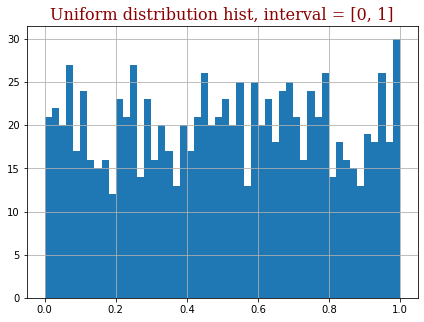

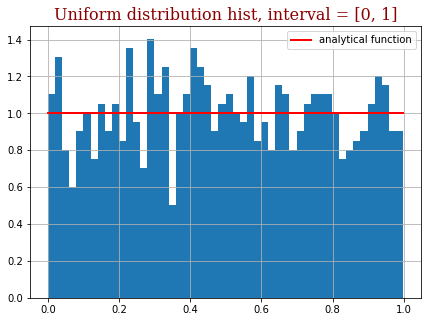

In [67]:
interval = np.array([0, 1])
samples = 1000
my_figure('uni', interval[0], interval[1], samples, r"Uniform distribution hist, interval = [0, 1]", font, 50, False)
my_figure('uni', interval[0], interval[1], samples, r"Uniform distribution hist, interval = [0, 1]", font, 50, True)

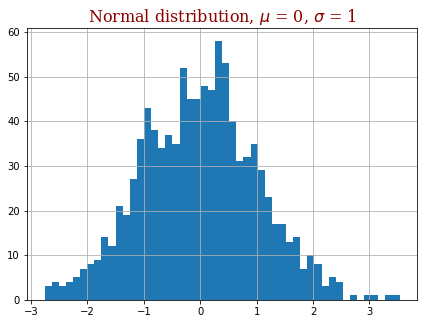

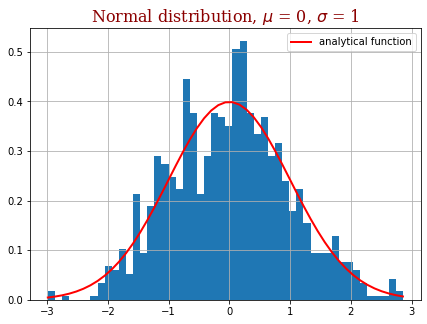

In [68]:
mean = 0
std_dev = 1
samples = 1000
my_figure('norm', mean, std_dev, samples, r"Normal distribution, $\mu$ = 0, $\sigma$ = 1", font, 50, False)
my_figure('norm', mean, std_dev, samples, r"Normal distribution, $\mu$ = 0, $\sigma$ = 1", font, 50, True)

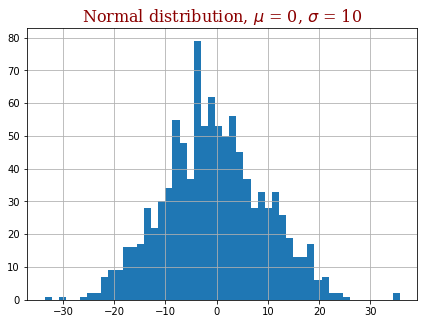

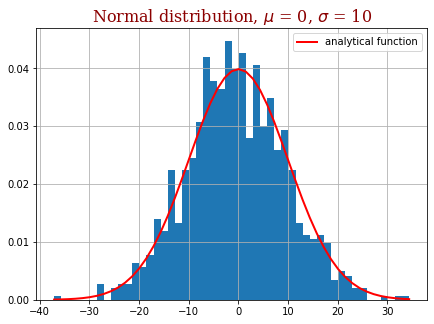

In [69]:
mean = 0
std_dev = 10
sample = 1000
my_figure('norm', mean, std_dev, samples, r"Normal distribution, $\mu$ = 0, $\sigma$ = 10", font, 50, False)
my_figure('norm', mean, std_dev, samples, r"Normal distribution, $\mu$ = 0, $\sigma$ = 10", font, 50, True)

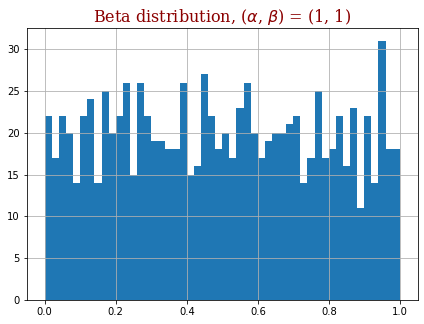

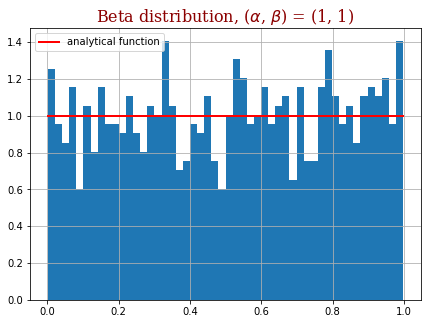

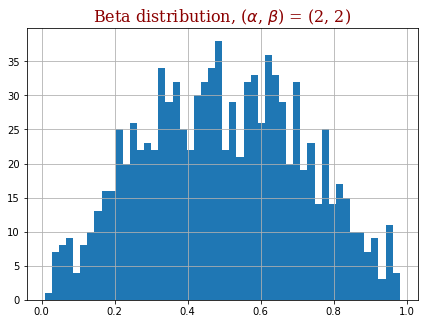

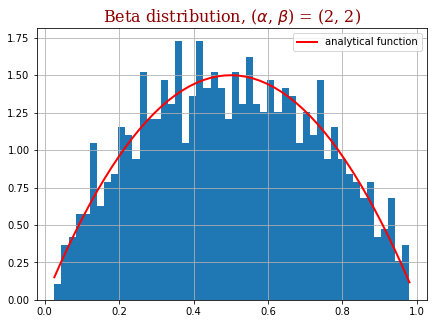

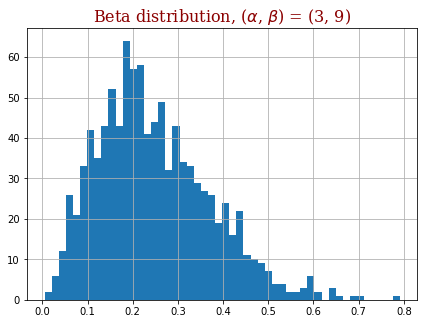

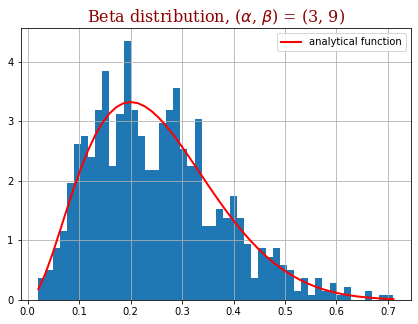

In [70]:
parameters = np.array([[1, 1], [2, 2], [3, 9]])
samples = 1000
my_figure('beta', parameters[0][0], parameters[0][1], samples, r"Beta distribution, ($\alpha$, $\beta$) = (1, 1)", font, 50, False)
my_figure('beta', parameters[0][0], parameters[0][1], samples, r"Beta distribution, ($\alpha$, $\beta$) = (1, 1)", font, 50, True)

my_figure('beta', parameters[1][0], parameters[1][1], samples, r"Beta distribution, ($\alpha$, $\beta$) = (2, 2)", font, 50, False)
my_figure('beta', parameters[1][0], parameters[1][1], samples, r"Beta distribution, ($\alpha$, $\beta$) = (2, 2)", font, 50, True)

my_figure('beta', parameters[2][0], parameters[2][1], samples, r"Beta distribution, ($\alpha$, $\beta$) = (3, 9)", font, 50, False)
my_figure('beta', parameters[2][0], parameters[2][1], samples, r"Beta distribution, ($\alpha$, $\beta$) = (3, 9)", font, 50, True)

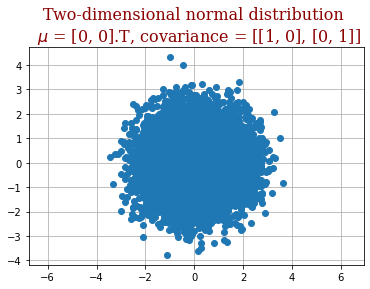

In [71]:
# mean = np.array([0, 0])[np.newaxis]
# mean = mean.T
mean = np.array([0, 0])
cov_matrix_1 = np.array([[1, 0], [0, 1]])
cov_matrix_2 = np.matrix([[2, 1], [1, 2]])

x_0, y_0 = np.random.multivariate_normal(mean, cov_matrix_1, 10000).T
plt.plot(x_0, y_0, 'o')
plt.axis('equal')
plt.grid(True)
plt.title('Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[1, 0], [0, 1]]', fontdict=font)
plt.show()

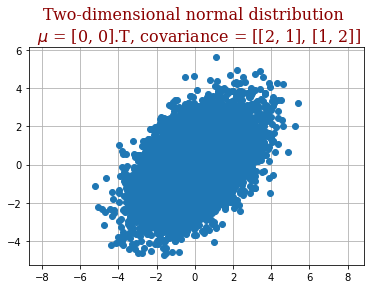

In [72]:
x_1, y_1 = np.random.multivariate_normal(mean, cov_matrix_2, 10000).T
plt.plot(x_1, y_1, 'o')
plt.axis('equal')
plt.grid(True)
plt.title('Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[2, 1], [1, 2]]', fontdict=font)
plt.show()

## **Exercise 4**

In [73]:
def my_hist2d_seaborn(x, y, bin, title):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    plt.hist2d(x, y, bins = bin, cmap = "RdYlGn_r")
    plt.title(f'hist2d', fontdict=font)
    plt.grid(True)

    plt.subplot(1,2,2)
    values = pd.DataFrame(np.array([x, y]).T, columns=['x', 'y'])
    sab.histplot(values, x = 'x', y = 'y', bins=bin)
    plt.title(f'seaborn', fontdict=font)
    plt.suptitle(f'{title}, bins = {bin}', fontdict=font)
    plt.grid(True)
    plt.show()

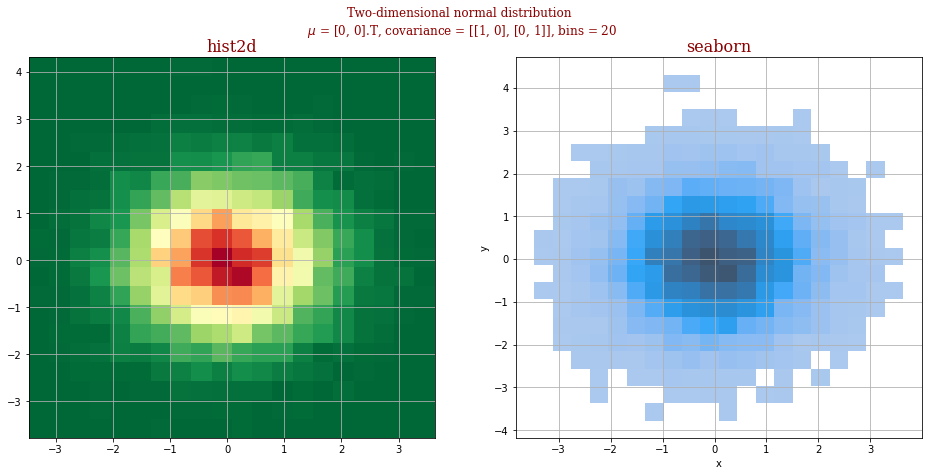

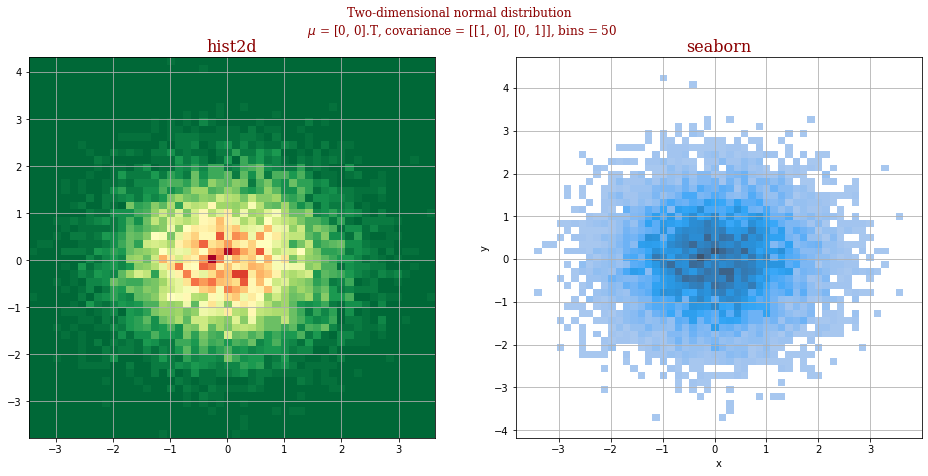

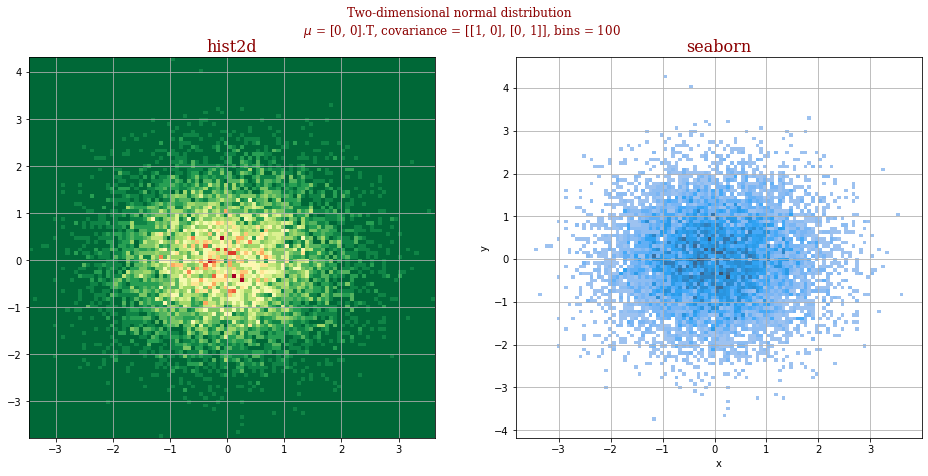

In [74]:
my_hist2d_seaborn(x_0, y_0, 20, 'Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[1, 0], [0, 1]]')
my_hist2d_seaborn(x_0, y_0, 50,'Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[1, 0], [0, 1]]')
my_hist2d_seaborn(x_0, y_0, 100,'Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[1, 0], [0, 1]]')

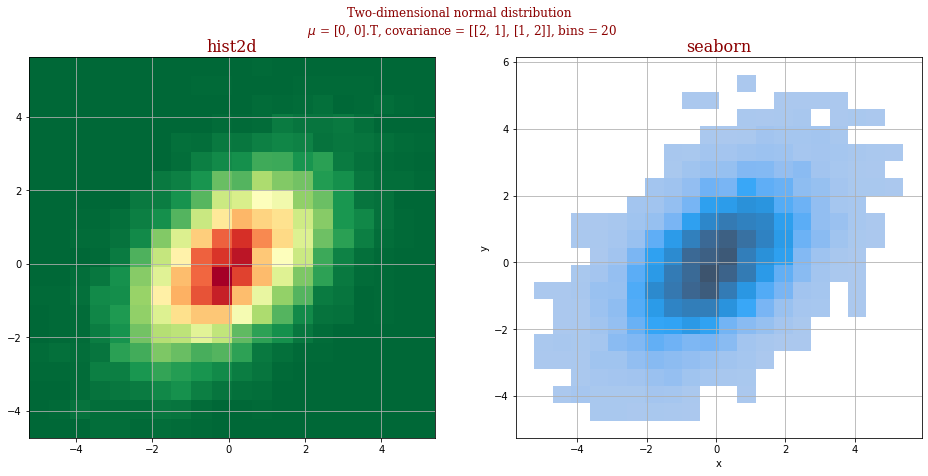

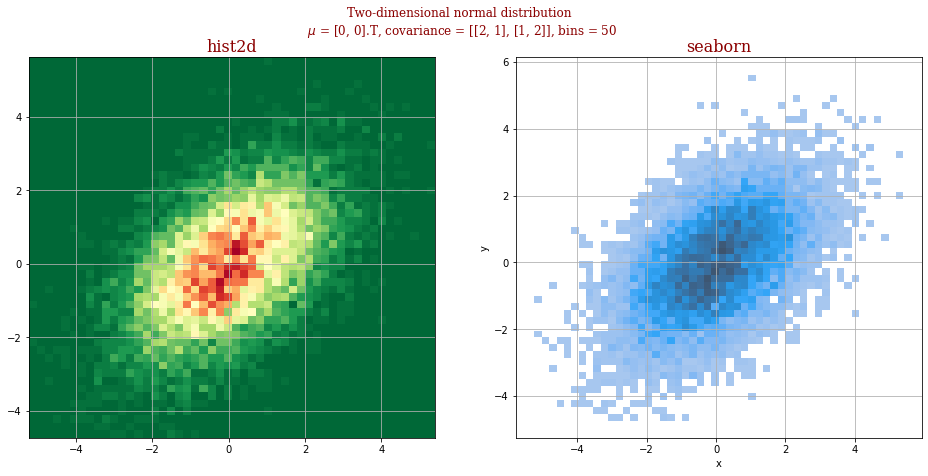

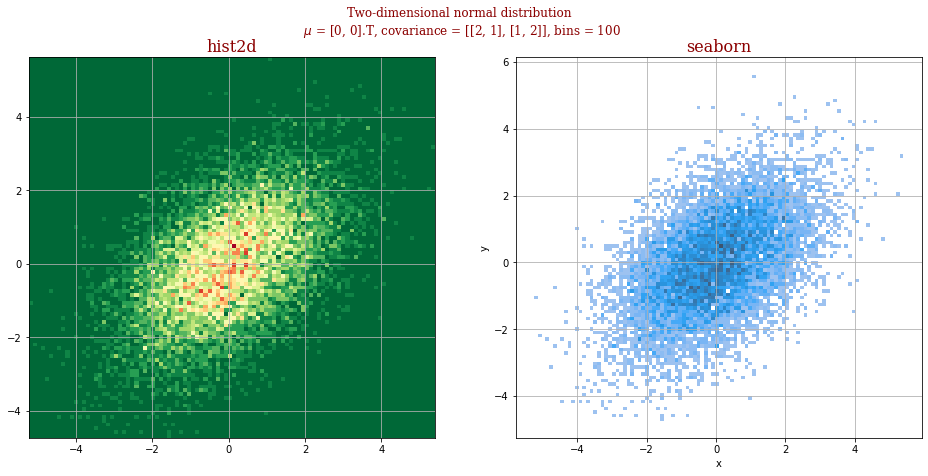

In [75]:
my_hist2d_seaborn(x_1, y_1, 20, 'Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[2, 1], [1, 2]]')
my_hist2d_seaborn(x_1, y_1, 50, 'Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[2, 1], [1, 2]]')
my_hist2d_seaborn(x_1, y_1, 100, 'Two-dimensional normal distribution \n $\mu$ = [0, 0].T, covariance = [[2, 1], [1, 2]]')

## **Exercise 5**

In [76]:
alpha = np.random.normal(2, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0, 3, 1000)
sigma = np.abs(np.random.normal(0, 1, 1000))

mu = alpha + (beta * x)

y = np.random.normal(mu, sigma, 1000)

## **Exercise 6**

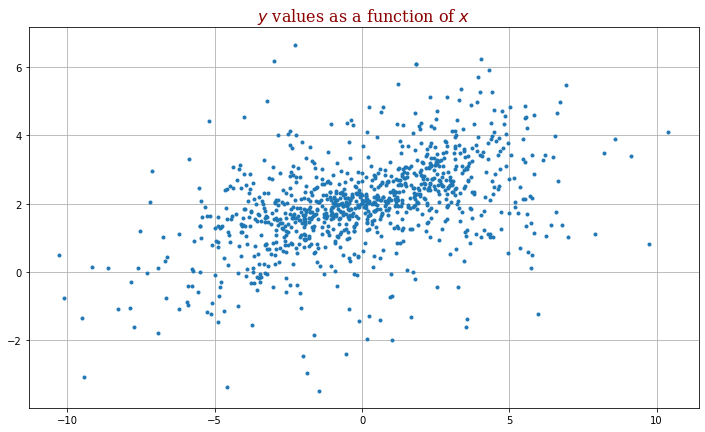

In [77]:
plt.figure(figsize=(12,7))
plt.plot(x, y, '.')
plt.grid(True)
plt.title(f'$y$ values as a function of $x$', fontdict=font)
plt.show()

In [78]:
x_ = x[(x > -6) & (x < 6)]
y_ = alpha + (beta * x)
y_ = y_[(x > -6) & (x < 6)]

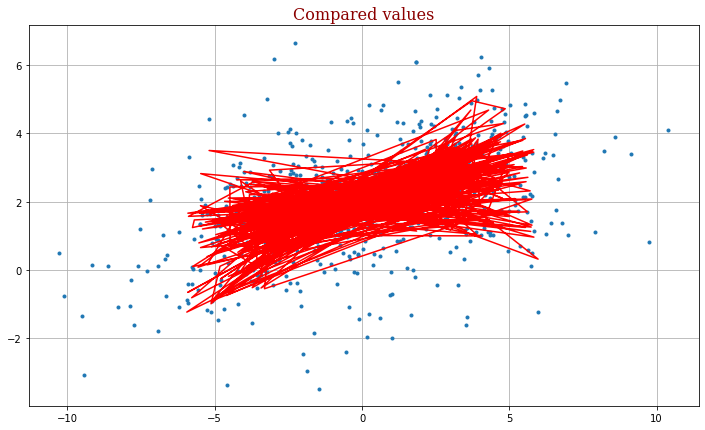

In [79]:
plt.figure(figsize=(12,7))
plt.plot(x, y, '.')
plt.plot(x_, y_, 'r-')
plt.grid(True)
plt.title(f'Compared values', fontdict=font)
plt.show()